In [ ]:
!pip install imbalanced-learn xgboost


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Autism-Prediction-using-Machine-Learning---DataSet.csv')
df.head()


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [ ]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})
df.dropna(inplace=True)  # Remove missing values if any


In [ ]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    int64  
 15  austim           200 non-null    int64  
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
A1_Score,200.0,0.575000,0.495584,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,200.0,0.555000,0.498213,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,200.0,0.475000,0.500628,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,200.0,0.425000,0.495584,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,200.0,0.450000,0.498742,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,200.0,0.340000,0.474898,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,200.0,0.420000,0.494797,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,200.0,0.545000,0.499220,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,200.0,0.540000,0.499648,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])


In [ ]:
print(df.columns)


Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation'],
      dtype='object')


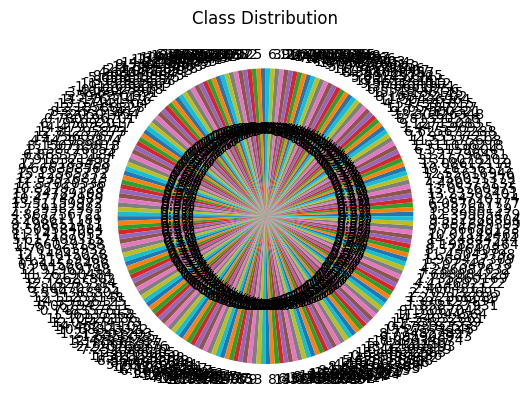

In [ ]:
plt.pie(df['result'].value_counts().values, labels=df['result'].value_counts().index, autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()


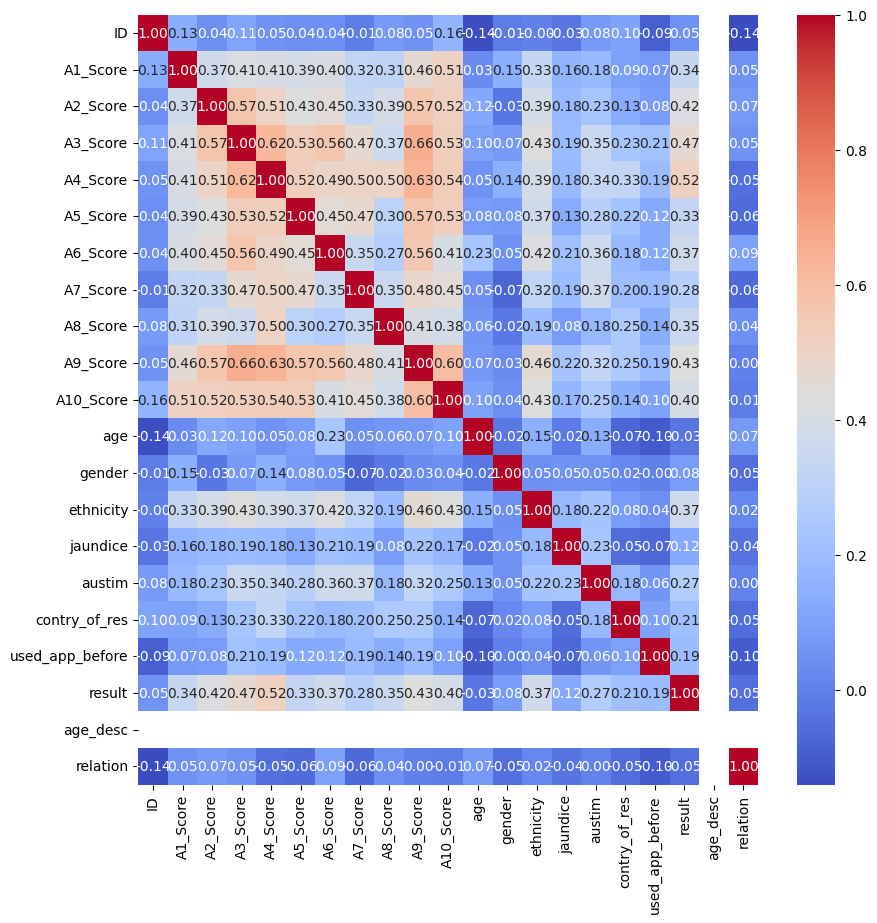

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [ ]:
df = df.drop(columns=['ID', 'age_desc', 'used_app_before', 'austim'])


In [ ]:
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)


In [ ]:
df['age'] = np.log(df['age'] + 1)  # Apply log transformation


In [ ]:
print(df_encoded.columns)


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'contry_of_res', 'result', 'relation',
       'ageGroup'],
      dtype='object')


In [ ]:
X = df_encoded.drop(columns=['result'])  # Replace 'austim' with 'result'
y = df_encoded['result']


In [ ]:
print(df.columns)


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'contry_of_res', 'result', 'relation',
       'ageGroup'],
      dtype='object')


In [ ]:
df_encoded.rename(columns={'jaundice': 'austim'}, inplace=True)


In [ ]:
print(df.columns)


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'contry_of_res', 'result', 'relation',
       'ageGroup'],
      dtype='object')


In [ ]:
df_encoded = df_encoded.rename(columns={'jaundice': 'austim'}).copy()
print(df_encoded.columns)


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'austim', 'contry_of_res', 'result', 'relation',
       'ageGroup'],
      dtype='object')


In [ ]:
print(df.columns)  # Print all column names exactly


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'contry_of_res', 'result', 'relation',
       'ageGroup'],
      dtype='object')


In [ ]:
print([col.strip().lower() for col in df.columns])


['a1_score', 'a2_score', 'a3_score', 'a4_score', 'a5_score', 'a6_score', 'a7_score', 'a8_score', 'a9_score', 'a10_score', 'age', 'gender', 'ethnicity', 'jaundice', 'contry_of_res', 'result', 'relation', 'agegroup']


In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Remove spaces
df.rename(columns=str.lower, inplace=True)  # Convert to lowercase


In [ ]:
print(df.columns)


Index(['a1_score', 'a2_score', 'a3_score', 'a4_score', 'a5_score', 'a6_score',
       'a7_score', 'a8_score', 'a9_score', 'a10_score', 'age', 'gender',
       'ethnicity', 'jaundice', 'contry_of_res', 'result', 'relation',
       'agegroup'],
      dtype='object')


In [ ]:
df = df.drop(columns=['austim'], errors='ignore')  # Do you have this line anywhere?


In [ ]:
df = pd.read_csv("/content/Autism-Prediction-using-Machine-Learning---DataSet.csv")
print(df.columns)


Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation'],
      dtype='object')


In [ ]:
for col in df.columns:
    if 'aut' in col.lower():
        print(col)  # Print any column with "aut" in its name


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'relation']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for inverse transformation if needed later

print(df.head())  # Check if encoding is done properly


   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  ...        age  gender  ethnicity  jaundice  austim  \
0         0         1  ...  15.599481       1         10         1       0   
1         1         0  ...  27.181099       1          1         0       0   
2         1         1  ...  31.643906       1         10         1       0   
3         0         0  ...  25.369210       1          0         0       0   
4         0         0  ...   9.078580       1          0         0       0   

   contry_of_res  used_app_before     result     age_des

In [ ]:
X = df.drop(columns=['austim'])  # Drop the target column
y = df['austim']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)


In [ ]:
print(df_encoded.dtypes)


A1_Score           int64
A2_Score           int64
A3_Score           int64
A4_Score           int64
A5_Score           int64
A6_Score           int64
A7_Score           int64
A8_Score           int64
A9_Score           int64
A10_Score          int64
age              float64
gender             int64
ethnicity          int64
jaundice           int64
contry_of_res      int64
result           float64
relation           int64
ageGroup          object
dtype: object


In [ ]:
print(df_encoded['result'].value_counts())
print(df_encoded['result'].dtype)


result
12.399055    1
9.882681     1
6.057018     1
12.847202    1
13.233034    1
            ..
14.248445    1
10.011495    1
9.756680     1
9.851649     1
9.532981     1
Name: count, Length: 200, dtype: int64
float64


In [ ]:
df_encoded['result'] = (df_encoded['result'] >= 0.5).astype(int)


In [ ]:
df_encoded['result'] = df_encoded['result'].astype(int)


In [ ]:
# Convert result column to binary if needed
df_encoded['result'] = (df_encoded['result'] >= 0.5).astype(int)  # Ensure discrete labels

X = df_encoded.drop(columns=['result'])
y = df_encoded['result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

# Train models
for model in models:
    model.fit(X_train, y_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]
    train_auc = metrics.roc_auc_score(y_train, y_train_prob)
    test_auc = metrics.roc_auc_score(y_test, y_test_prob)
    print(f'{model.__class__.__name__} : ')
    print(f'Training AUC-ROC Score : {train_auc:.4f}')
    print(f'Validation AUC-ROC Score : {test_auc:.4f}')
    print()


LogisticRegression : 
Training AUC-ROC Score : 0.9189
Validation AUC-ROC Score : 0.5921

XGBClassifier : 
Training AUC-ROC Score : 1.0000
Validation AUC-ROC Score : 0.6974

SVC : 
Training AUC-ROC Score : 1.0000
Validation AUC-ROC Score : 0.6184



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best AUC score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best AUC score: 0.7703448275862069


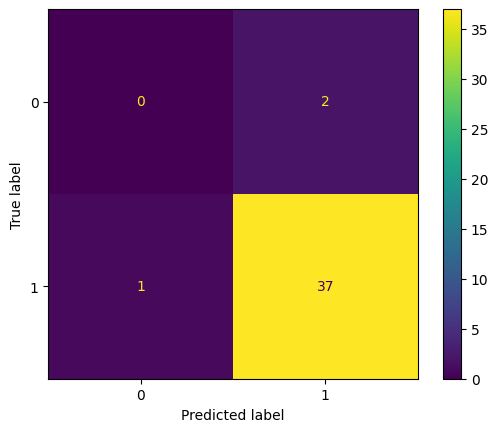

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

best_model = models[0]  # Choose Logistic Regression as the best model
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()


In [ ]:
import joblib
joblib.dump(best_model, 'autism_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
print(X_train.shape)


(298, 17)


In [ ]:
import os
print(os.path.exists('autism_prediction_model.pkl'))
print(os.path.exists('scaler.pkl'))


True
True


In [ ]:
print("Number of features in training data:", X_train.shape[1])


Number of features in training data: 17


In [ ]:
print(df_encoded.columns)


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'contry_of_res', 'result', 'relation',
       'ageGroup'],
      dtype='object')


In [ ]:
print(len(X_train[0]))  # Number of features used in training
print(sample_data.shape[1])  # Number of features in test data



17
20


In [ ]:
sample_data = np.array([[6, 1, 0, 2, 4, 5, 0, 2, 6, 0, 0, 3, 1, 0, 0, 1, 2]])  # Only 17 values
sample_data = sample_data.reshape(1, -1)  # Reshape to 2D
sample_data = scaler.transform(sample_data)  # Apply the trained scaler
prediction = model.predict(sample_data)

print("Autism Prediction:", "Positive" if prediction[0] == 1 else "Negative")


Autism Prediction: Positive


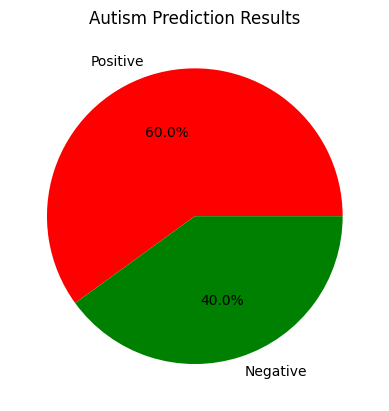

In [ ]:
import matplotlib.pyplot as plt

# Example: Suppose you tested 10 people, and these are the results
predictions = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]  # 1 = Positive, 0 = Negative

labels = ['Positive', 'Negative']
values = [predictions.count(1), predictions.count(0)]

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title("Autism Prediction Results")
plt.show()


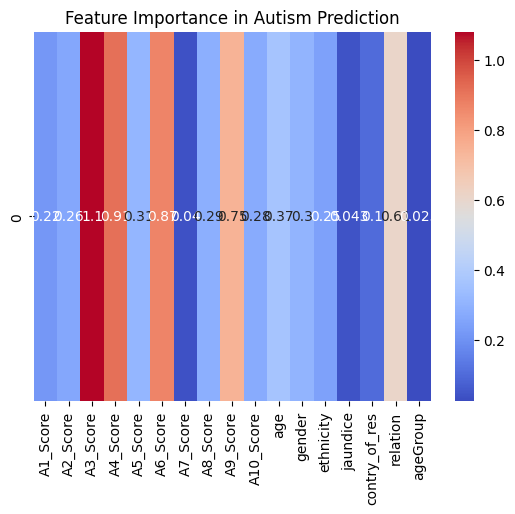

In [ ]:
import seaborn as sns
import numpy as np

# Get feature importance (works for tree-based models like XGBoost)
if hasattr(model, "feature_importances_"):
    importance = model.feature_importances_
else:
    importance = np.abs(model.coef_)[0]  # For Logistic Regression

# Plot the heatmap
sns.heatmap([importance], annot=True, cmap="coolwarm", xticklabels=X.columns)
plt.title("Feature Importance in Autism Prediction")
plt.show()


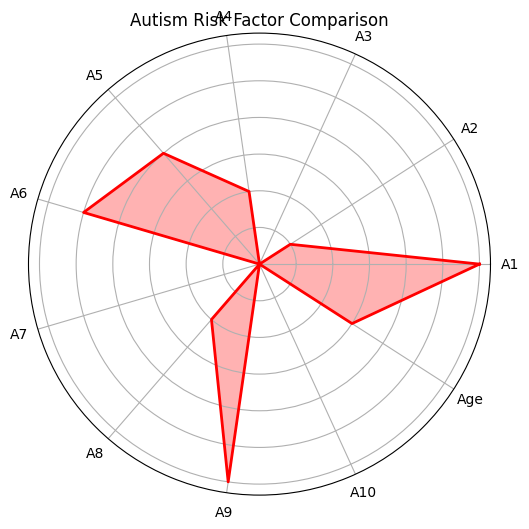

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example patient data (normalized values)
categories = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "Age"]
values = [6, 1, 0, 2, 4, 5, 0, 2, 6, 0, 3]  # Example values

# Create a radar chart
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
values += values[:1]  # Repeat first value to close the circle
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.3)
ax.plot(angles, values, color='red', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title("Autism Risk Factor Comparison")
plt.show()
